In [ ]:
# !pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium matplotlib
import folium
!pip install geopy
from geopy.geocoders import Nominatim

In [ ]:
m = folium.Map(zoom_start = 6)

existing_dcs = [
    {'latitude': 35.393528, 'longitude': - 119.043732, 'name': 'Bakersfield, CA'},
    {'latitude': 38.2805, 'longitude': -104.4672, 'name': 'Pueblo, CO'},
    {'latitude': 44.979595, 'longitude': -93.276566, 'name': 'Woodbury, MN'},
    {'latitude': 40.028900, 'longitude': -77.590698, 'name': 'Chambersberg, PN'}
]

for location in existing_dcs:
    new_marker = folium.Marker(
        location=[location['latitude'], location['longitude']],
        popup=location['name'],
        icon=folium.Icon(color='red')
    )

    new_marker.add_to(m)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Target Upcurve/Project/DC_Planning.csv')

In [ ]:
df['latitude'] = df['geographic_loc'].str.extract(r'\((.*?),')[0].astype(float)
df['longitude'] = df['geographic_loc'].str.extract(r',(.*)\)', expand=False).astype(float)
df.head(5)

,guest_id,geographic_loc,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,state,country,latitude,longitude
0,G50029,"(41.9345228822601,-114.793454289252)",12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,Nevada,United States,41.934523,-114.793454
1,G39532,"(28.4114060271366,-98.0530295882411)",17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,Texas,United States,28.411406,-98.053030
2,G93168,"(37.8619825697659,-79.3247968858362)",9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,Virginia,United States,37.861983,-79.324797
3,G34201,"(33.1011843427186,-115.570115912097)",3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,California,United States,33.101184,-115.570116
4,G69749,"(49.0223887139561,-123.155574774425)",14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,British Columbia,Canada,49.022389,-123.155575


In [ ]:
df2 = df.drop(['guest_id','country','geographic_loc','state'],axis =1)

In [ ]:
df2.head(5)

,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,latitude,longitude
0,12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,41.934523,-114.793454
1,17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,28.411406,-98.053030
2,9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,37.861983,-79.324797
3,3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,33.101184,-115.570116
4,14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,49.022389,-123.155575


In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

numerical_cols = ['order_frequency','returns_rate']
# scaler = StandardScaler()
# df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])


In [ ]:
categorical_cols = ['shipping_preferences','promotional_response']
# encoder = LabelEncoder()
# df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])
encoder = OrdinalEncoder()
df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])


In [ ]:
# df2[categorical_cols]

In [ ]:
combined_features = numerical_cols + categorical_cols
combined_features

['order_frequency',
 'returns_rate',
 'shipping_preferences',
 'promotional_response']

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14496, ncost: 4160978.1139421705
Run: 1, iteration: 2/100, moves: 5689, ncost: 3898680.069676427
Run: 1, iteration: 3/100, moves: 3045, ncost: 3821921.9896063614
Run: 1, iteration: 4/100, moves: 1349, ncost: 3811223.4363183663
Run: 1, iteration: 5/100, moves: 437, ncost: 3810066.8380261688
Run: 1, iteration: 6/100, moves: 160, ncost: 3809869.576149109
Run: 1, iteration: 7/100, moves: 75, ncost: 3809837.9963225955
Run: 1, iteration: 8/100, moves: 29, ncost: 3809830.883771114
Run: 1, iteration: 9/100, moves: 18, ncost: 3809827.2912948853
Run: 1, iteration: 10/100, moves: 13, ncost: 3809825.8482304984
Run: 1, iteration: 11/100, moves: 6, ncost: 3809825.5621503056
Run: 1, iteration: 12/100, moves: 1, ncost: 3809825.5516234064
Run: 1, iteration: 13/100, moves: 0, ncost: 3809825.5516234064
Init: initializi

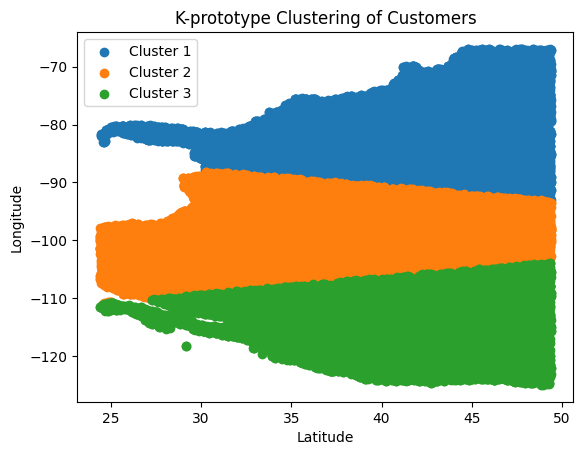

In [ ]:
selected_features1 = ['latitude','longitude','order_frequency','returns_rate','shipping_preferences']
k = 3
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features1].values, categorical=[4])
df2['cluster1'] = clusters
for cluster_num in range(k):
    cluster_data = df2[df2['cluster1'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()



In [ ]:
print(clusters)

[0 2 1 ... 1 0 0]


In [ ]:
df2['cluster1'].unique()

KeyError: ignored

In [ ]:
m1 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster1'].unique():
    cluster_data = df2[df2['cluster1'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker1 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='blue')
    )

    marker1.add_to(m)
    marker1.add_to(m1)
m1

KeyError: ignored

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5529, ncost: 3881774.466803174
Run: 1, iteration: 2/100, moves: 2771, ncost: 3828133.9204533747
Run: 1, iteration: 3/100, moves: 1475, ncost: 3814855.892457628
Run: 1, iteration: 4/100, moves: 690, ncost: 3811461.7478849813
Run: 1, iteration: 5/100, moves: 385, ncost: 3810281.7430799655
Run: 1, iteration: 6/100, moves: 242, ncost: 3809841.0900550927
Run: 1, iteration: 7/100, moves: 127, ncost: 3809717.498609302
Run: 1, iteration: 8/100, moves: 66, ncost: 3809674.8594695325
Run: 1, iteration: 9/100, moves: 58, ncost: 3809654.375734929
Run: 1, iteration: 10/100, moves: 24, ncost: 3809648.8911365364
Run: 1, iteration: 11/100, moves: 18, ncost: 3809647.463740299
Run: 1, iteration: 12/100, moves: 4, ncost: 3809647.308553604
Run: 1, iteration: 13/100, moves: 1, ncost: 3809647.288850726
Run: 1, iteration: 1

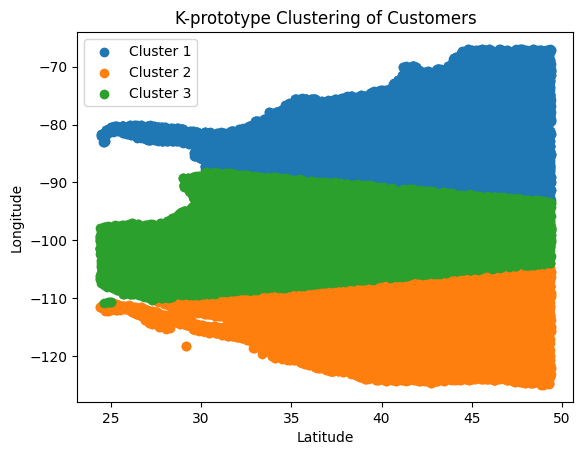

In [ ]:
selected_features2 = ['latitude','longitude','order_frequency','returns_rate','promotional_response']
k = 3
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features2].values, categorical=[4])
df2['cluster2'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster2'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()



In [ ]:
#map
m2 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=6)
for cluster in df2['cluster2'].unique():
    cluster_data = df2[df2['cluster2'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker2 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='green')
    )

    marker2.add_to(m)
    marker2.add_to(m2)
m2

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4031, ncost: 3943195.215952327
Run: 1, iteration: 2/100, moves: 1620, ncost: 3921344.625482189
Run: 1, iteration: 3/100, moves: 1041, ncost: 3913428.3549015024
Run: 1, iteration: 4/100, moves: 616, ncost: 3910667.416747336
Run: 1, iteration: 5/100, moves: 416, ncost: 3909380.9430116536
Run: 1, iteration: 6/100, moves: 287, ncost: 3908757.895762735
Run: 1, iteration: 7/100, moves: 178, ncost: 3908562.983780437
Run: 1, iteration: 8/100, moves: 82, ncost: 3908515.879876428
Run: 1, iteration: 9/100, moves: 39, ncost: 3908503.9298231825
Run: 1, iteration: 10/100, moves: 31, ncost: 3908497.3708279287
Run: 1, iteration: 11/100, moves: 15, ncost: 3908496.1146547315
Run: 1, iteration: 12/100, moves: 2, ncost: 3908496.079615608
Run: 1, iteration: 13/100, moves: 0, ncost: 3908496.079615608
Init: initializing ce

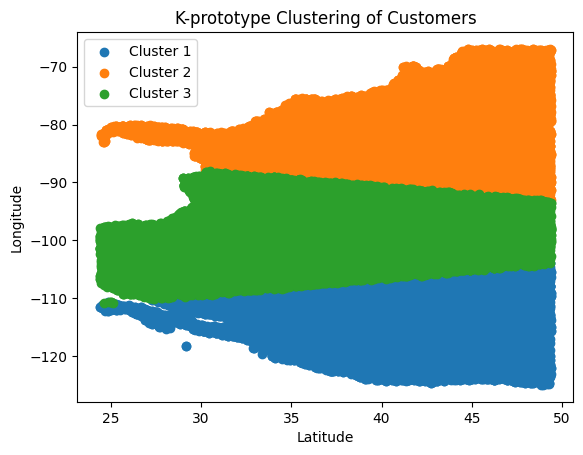

In [ ]:
selected_features3 = ['latitude','longitude','order_frequency','returns_rate','shipping_preferences','promotional_response']
k = 3
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features3].values, categorical=[4,5])

#scatterplot
df2['cluster3'] = clusters
for cluster_num in range(k):
  cluster_data = df2[df2['cluster3'] == cluster_num]
  plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [ ]:
#map
m3 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=6)
for cluster in df2['cluster3'].unique():
    cluster_data = df2[df2['cluster3'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    location = geolocator.reverse(cluster_center, exactly_one=True)
    location_name = location.address

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker3 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='orange')
    )

    marker3.add_to(m)
    marker3.add_to(m3)
m3

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8414, ncost: 3861012.0374896475
Run: 1, iteration: 2/100, moves: 1416, ncost: 3846933.745941208
Run: 1, iteration: 3/100, moves: 734, ncost: 3842823.1253207247
Run: 1, iteration: 4/100, moves: 427, ncost: 3841429.7563276542
Run: 1, iteration: 5/100, moves: 293, ncost: 3840800.201287017
Run: 1, iteration: 6/100, moves: 163, ncost: 3840605.7046939926
Run: 1, iteration: 7/100, moves: 73, ncost: 3840567.6832303586
Run: 1, iteration: 8/100, moves: 47, ncost: 3840553.335660458
Run: 1, iteration: 9/100, moves: 31, ncost: 3840546.1946493015
Run: 1, iteration: 10/100, moves: 17, ncost: 3840544.010877823
Run: 1, iteration: 11/100, moves: 7, ncost: 3840543.24981714
Run: 1, iteration: 12/100, moves: 16, ncost: 3840541.4606049284
Run: 1, iteration: 13/100, moves: 16, ncost: 3840539.78317213
Run: 1, iteration: 14/

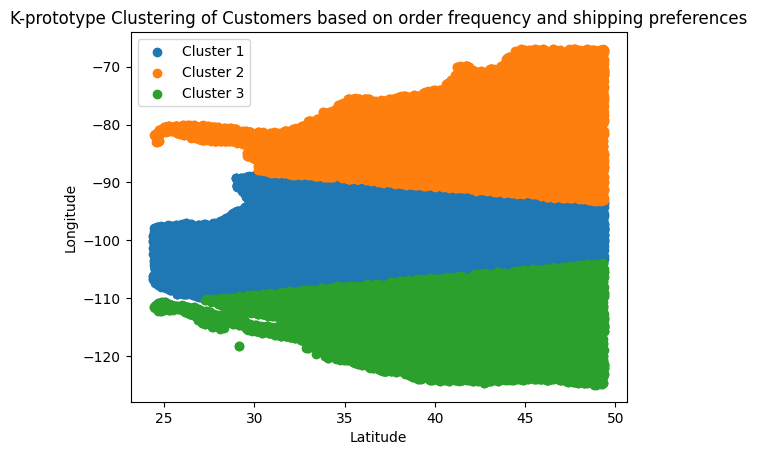

In [ ]:
selected_features4 = ['latitude','longitude','order_frequency','shipping_preferences']
k = 3
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features4].values, categorical=[3])
df2['cluster4'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster4'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency and shipping preferences')
plt.legend()
plt.show()



In [ ]:
#map
m4 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster4'].unique():
    cluster_data = df2[df2['cluster4'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker4 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='darkgreen')
    )

    marker4.add_to(m)
    marker4.add_to(m4)
m4

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5511, ncost: 4067898.7505305256
Run: 1, iteration: 2/100, moves: 3811, ncost: 3954686.372375655
Run: 1, iteration: 3/100, moves: 2939, ncost: 3893926.2076285677
Run: 1, iteration: 4/100, moves: 2077, ncost: 3864454.5735429237
Run: 1, iteration: 5/100, moves: 1448, ncost: 3850134.2828686563
Run: 1, iteration: 6/100, moves: 957, ncost: 3844091.329099107
Run: 1, iteration: 7/100, moves: 595, ncost: 3841743.873353763
Run: 1, iteration: 8/100, moves: 369, ncost: 3840826.2323640236
Run: 1, iteration: 9/100, moves: 245, ncost: 3840457.1355424183
Run: 1, iteration: 10/100, moves: 151, ncost: 3840308.8594718534
Run: 1, iteration: 11/100, moves: 76, ncost: 3840270.744050761
Run: 1, iteration: 12/100, moves: 48, ncost: 3840256.383010281
Run: 1, iteration: 13/100, moves: 25, ncost: 3840252.540787382
Run: 1, iter

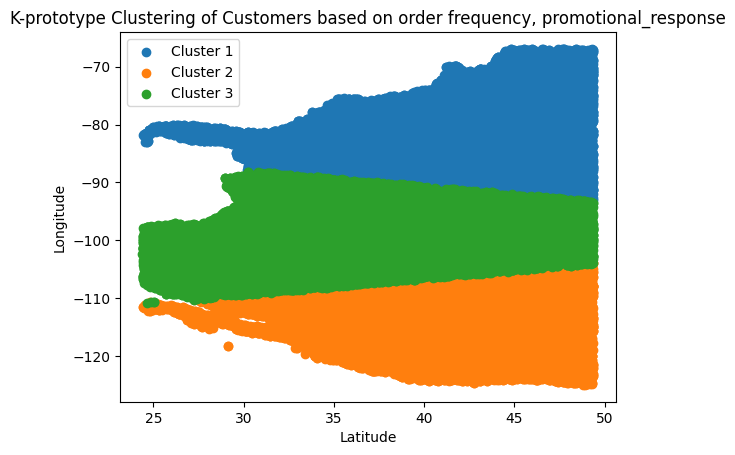

In [ ]:
selected_features5 = ['latitude','longitude','order_frequency','promotional_response']
k = 3
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features5].values, categorical=[3])
df2['cluster5'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster5'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency, promotional_response')
plt.legend()
plt.show()

In [ ]:
#map
m5 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster5'].unique():
    cluster_data = df2[df2['cluster5'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

    marker5 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='lightgray')
    )

    marker5.add_to(m)
    marker5.add_to(m5)
m5

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8768, ncost: 4028593.422337992
Run: 1, iteration: 2/100, moves: 2461, ncost: 3993968.8244871777
Run: 1, iteration: 3/100, moves: 1343, ncost: 3980511.783271725
Run: 1, iteration: 4/100, moves: 893, ncost: 3974877.7171090683
Run: 1, iteration: 5/100, moves: 600, ncost: 3972417.3143532053
Run: 1, iteration: 6/100, moves: 369, ncost: 3971554.7551875226
Run: 1, iteration: 7/100, moves: 230, ncost: 3971218.4054242414
Run: 1, iteration: 8/100, moves: 150, ncost: 3971065.893075405
Run: 1, iteration: 9/100, moves: 94, ncost: 3971011.1409893287
Run: 1, iteration: 10/100, moves: 48, ncost: 3970995.994081942
Run: 1, iteration: 11/100, moves: 25, ncost: 3970992.3203688907
Run: 1, iteration: 12/100, moves: 11, ncost: 3970991.71804015
Run: 1, iteration: 13/100, moves: 2, ncost: 3970991.666115856
Run: 1, iteration:

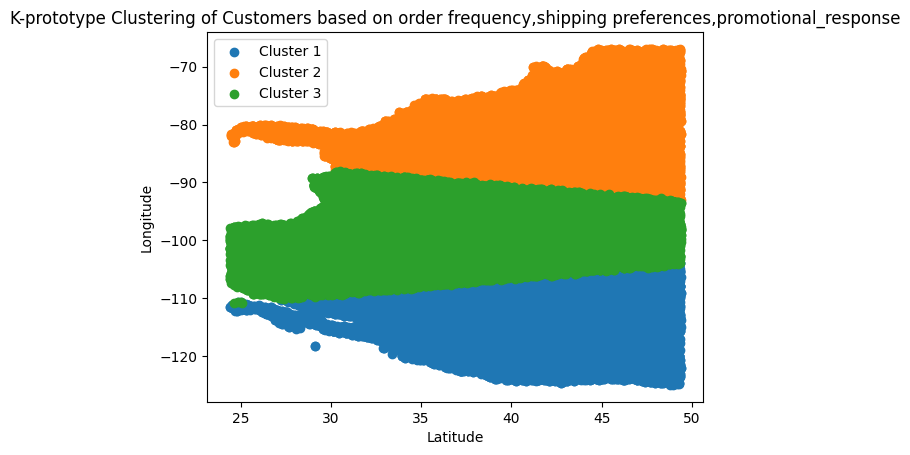

In [ ]:
selected_features6 = ['latitude','longitude','order_frequency','shipping_preferences','promotional_response']
k = 3
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features6].values, categorical=[3,4])
df2['cluster6'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster6'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency,shipping preferences,promotional_response')
plt.legend()
plt.show()

In [ ]:
#map
m6 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster6'].unique():
    cluster_data = df2[df2['cluster6'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker6 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='darkblue')
    )

    marker6.add_to(m)
    marker6.add_to(m6)
m6

In [ ]:
m.fit_bounds(m.get_bounds())
m

In [ ]:
m